<a href="https://colab.research.google.com/github/11TRNP/Autoimmune-Nonautoimmune-Classification/blob/main/Bismillah_Bisa_Yuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Check Library**

In [ ]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.3
aiohttp                            3.11.2
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.6
astropy-iers-data                  0.2024.11.18.0.35.2
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           

**Import Library**

In [1]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

**Menghubungkan Colab dengan Drive**

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


**Menghubungkan Direktori**

In [4]:
base_dir = '/content/drive/My Drive/DATASET/source'
output_dir = '/content/drive/My Drive/DATASET/output'
train_dir = '/content/drive/My Drive/DATASET/output/train'
val_dir = '/content/drive/My Drive/DATASET/output/val'
test_dir = '/content/drive/My Drive/DATASET/output/test'
manipulation = '/content/drive/My Drive/DATASET/output/manipulation'
augmented = '/content/drive/My Drive/DATASET/output/manipulation/augmented'
mask = '/content/drive/My Drive/DATASET/output/manipulation/mask'

print(os.listdir(base_dir))
print(" ")
print(os.listdir(output_dir))

['Autoimun_Dermatomyositis', 'Autoimun_Vitiligo', 'Autoimun_Psoriasis', 'Autoimun_Lichen_Planus', 'Nonautoimun_Tinea', 'Nonautoimun_Eczema', 'Nonautoimun_Herpes', 'Nonautoimun_Keratosis_Seborrheic']
 
['test', 'train', 'val', 'manipulation']


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (300, 300)

In [6]:
image_dir = Path(base_dir)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png'))  + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.gif'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [7]:
image_df

Filepath  \
0     /content/drive/My Drive/DATASET/source/Autoimu...   
1     /content/drive/My Drive/DATASET/source/Autoimu...   
2     /content/drive/My Drive/DATASET/source/Autoimu...   
3     /content/drive/My Drive/DATASET/source/Autoimu...   
4     /content/drive/My Drive/DATASET/source/Autoimu...   
...                                                 ...   
2759  /content/drive/My Drive/DATASET/source/Nonauto...   
2760  /content/drive/My Drive/DATASET/source/Nonauto...   
2761  /content/drive/My Drive/DATASET/source/Nonauto...   
2762  /content/drive/My Drive/DATASET/source/Nonauto...   
2763  /content/drive/My Drive/DATASET/source/Nonauto...   

                                 Label  
0             Autoimun_Dermatomyositis  
1             Autoimun_Dermatomyositis  
2             Autoimun_Dermatomyositis  
3             Autoimun_Dermatomyositis  
4             Autoimun_Dermatomyositis  
...                                ...  
2759  Nonautoimun_Keratosis_Seborrheic  
2760  Nonautoimun_Keratosis_Seborrheic  
2761  Nonautoimun_Keratosis_Seborrheic  
2762  Nonautoimun_Keratosis_Seborrheic  
2763  Nonautoimun_Keratosis_Seborrheic  

[2764 rows x 2 columns]

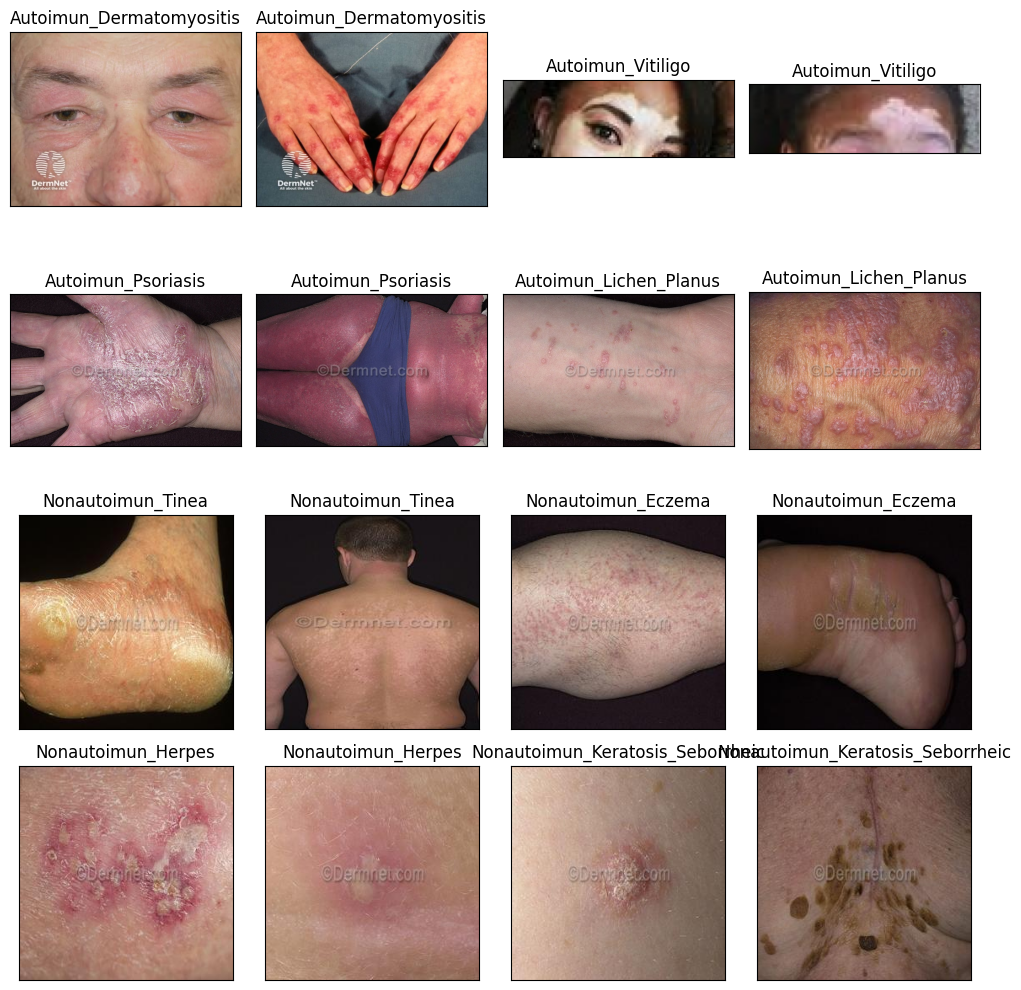

In [12]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_dir = '/content/drive/My Drive/DATASET/source' # Replace with your base directory
diseases = ['Autoimun_Dermatomyositis', 'Autoimun_Vitiligo', 'Autoimun_Psoriasis', 'Autoimun_Lichen_Planus',
            'Nonautoimun_Tinea', 'Nonautoimun_Eczema', 'Nonautoimun_Herpes', 'Nonautoimun_Keratosis_Seborrheic']

num_images_per_disease = 2

# Collect image paths for each disease
image_paths = []
for disease in diseases:
    disease_dir = os.path.join(base_dir, disease)
    image_files = [f for f in os.listdir(disease_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    image_paths.extend([os.path.join(disease_dir, f) for f in random.sample(image_files, num_images_per_disease)])

# Display the images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    ax.set_title(os.path.basename(os.path.dirname(image_paths[i])))  # Extract disease name from path
plt.tight_layout()
plt.show()

In [20]:
!pip install opencv-python

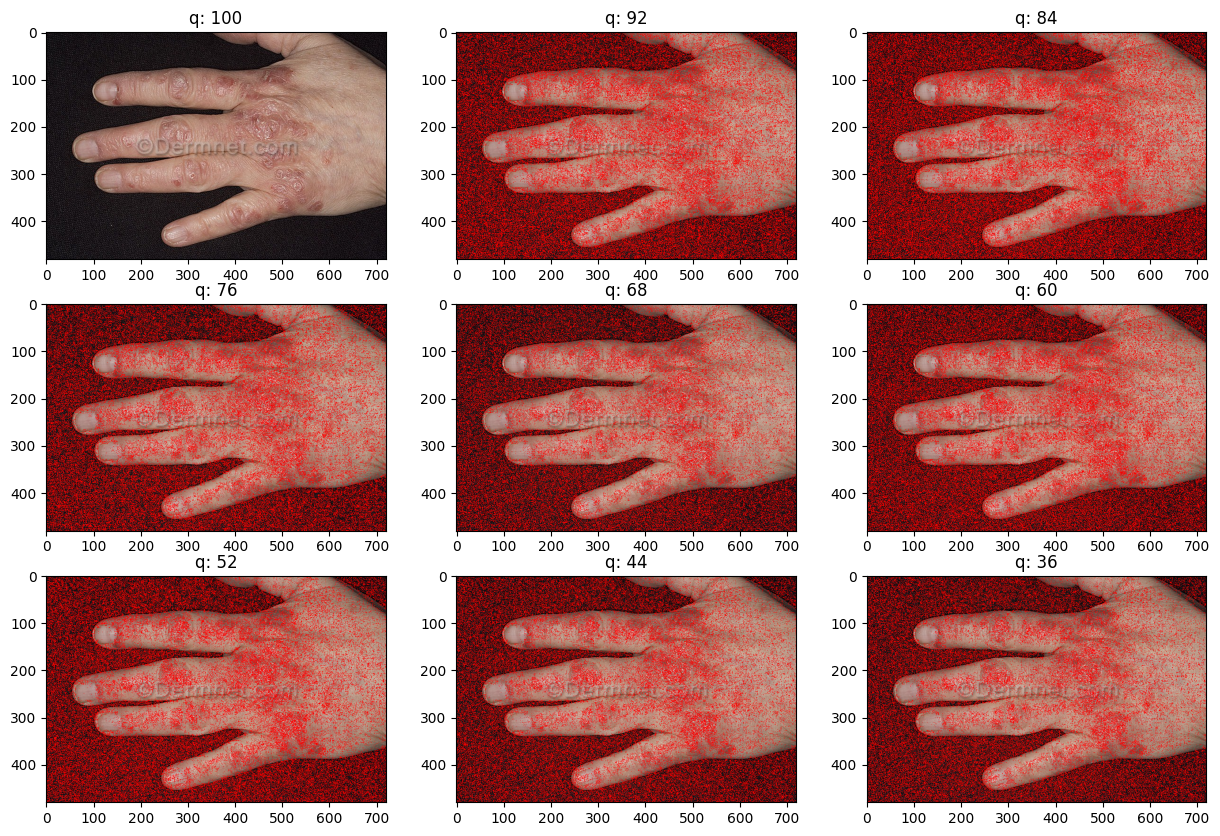

In [29]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image
from io import BytesIO

def random_sample(base_dir, subfolder):
    folder_path = os.path.join(base_dir, subfolder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    if image_files:
        return os.path.join(folder_path, random.choice(image_files))
    else:
        return None

def compute_ela_cv(path, quality):
    """
    Compute ELA using OpenCV.

    Args:
        path (str): Path to the image file.
        quality (int): JPEG compression quality (1-100).

    Returns:
        numpy.ndarray: ELA image as a NumPy array.
    """

    # Load the image
    img = cv2.imread(path)

    # Encode the image with the specified quality
    retval, buf = cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])

    # Decode the encoded image
    img_decoded = cv2.imdecode(buf, cv2.IMREAD_COLOR)

    # Convert images to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_decoded_gray = cv2.cvtColor(img_decoded, cv2.COLOR_BGR2GRAY)

    # Calculate ELA
    ela = cv2.absdiff(img_gray, img_decoded_gray)

    return ela


# ... (kode untuk base_dir, dll.) ...

# View random sample from the dataset
p = random_sample(base_dir, 'Autoimun_Psoriasis')

if p is not None:
    orig = cv2.imread(p)
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0

    init_val = 100
    columns = 3
    rows = 3

    fig = plt.figure(figsize=(15, 10))
    for i in range(1, columns*rows + 1):
        quality = init_val - (i - 1) * 8
        ela_img = compute_ela_cv(path=p, quality=quality)

        if i == 1:
            img = orig.copy()
        else:
            # Membuat mask dari ELA image
            threshold, mask = cv2.threshold(ela_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Menggabungkan mask dengan gambar asli
            img = orig.copy() #Fixed indentation here
            img[mask == 255] = [1, 0, 0] #Fixed indentation here

        ax = fig.add_subplot(rows, columns, i)
        ax.title.set_text(f'q: {quality}')
        plt.imshow(img)

    plt.show()
else:
    print("No images found in the specified subfolder.")

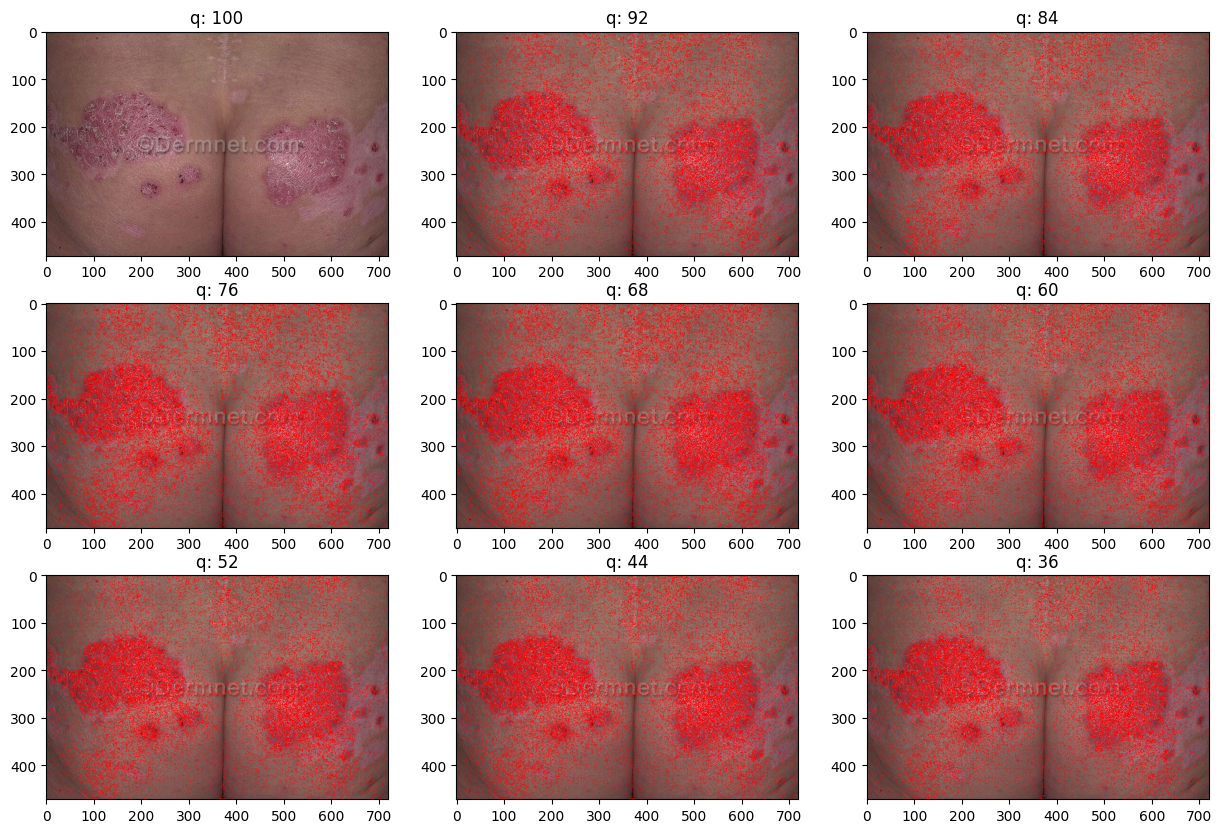

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image
from io import BytesIO

def random_sample(base_dir, subfolder):
    folder_path = os.path.join(base_dir, subfolder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    if image_files:
        return os.path.join(folder_path, random.choice(image_files))
    else:
        return None

def compute_ela_cv(path, quality):
    """
    Compute ELA using OpenCV.

    Args:
        path (str): Path to the image file.
        quality (int): JPEG compression quality (1-100).

    Returns:
        numpy.ndarray: ELA image as a NumPy array.
    """

    # Load the image
    img = cv2.imread(path)

    # Encode the image with the specified quality
    retval, buf = cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])

    # Decode the encoded image
    img_decoded = cv2.imdecode(buf, cv2.IMREAD_COLOR)

    # Convert images to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_decoded_gray = cv2.cvtColor(img_decoded, cv2.COLOR_BGR2GRAY)

    # Calculate ELA
    ela = cv2.absdiff(img_gray, img_decoded_gray)

    return ela


# ... (kode untuk base_dir, dll.) ...

# View random sample from the dataset
p = random_sample(base_dir, 'Autoimun_Psoriasis')

if p is not None:
    orig = cv2.imread(p)
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0

    init_val = 100
    columns = 3
    rows = 3

    fig = plt.figure(figsize=(15, 10))
    for i in range(1, columns*rows + 1):
        quality = init_val - (i - 1) * 8
        ela_img = compute_ela_cv(path=p, quality=quality)

        if i == 1:
            img = orig.copy()
        else:
            # Membuat mask dari ELA image
            threshold, mask = cv2.threshold(ela_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Menggabungkan mask dengan gambar asli
            img = orig.copy() #Fixed indentation here
            img[mask == 255] = [1, 0, 0] #Fixed indentation here

        ax = fig.add_subplot(rows, columns, i)
        ax.title.set_text(f'q: {quality}')
        plt.imshow(img)

    plt.show()
else:
    print("No images found in the specified subfolder.")

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [32]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,  # Rotasi acak hingga 20 derajat
    width_shift_range=0.2,  # Pergeseran horizontal acak hingga 20% dari lebar gambar
    height_shift_range=0.2, # Pergeseran vertikal acak hingga 20% dari tinggi gambar
    shear_range=0.2,  # Shear transformation (memiringkan gambar) hingga 20 derajat
    zoom_range=0.2,  # Zoom acak hingga 20%
    horizontal_flip=True,  # Flip horizontal acak
    fill_mode='nearest', # Cara mengisi piksel kosong setelah transformasi (nearest, reflect, dll.)
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [33]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1769 validated image filenames belonging to 8 classes.
Found 442 validated image filenames belonging to 8 classes.
Found 553 validated image filenames belonging to 8 classes.


In [34]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
# Create checkpoint callback
checkpoint_path = "autoimun_nonautoimun_classification_model_checkpoint.weights.h5" # Change the file extension to .weights.h5
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [39]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 5 epochs in a row, stop training

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras.callbacks import TensorBoard # Import TensorBoard

# Assuming 'resize_and_rescale' was intended to resize and rescale the input images,
# the following code replaces it with the corresponding Keras preprocessing layers:
#from tensorflow import keras
# Instead of importing keras directly, import Resizing and Rescaling from tensorflow.keras.layers.experimental.preprocessing

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


inputs = pretrained_model.input
# Resize the input images to the desired size
x = Resizing(224, 224)(inputs) # Resize images to (224, 224)
# Rescale the pixel values to the range [0, 1]
x = Rescaling(1./255)(x) # Rescale pixel values to [0, 1]

x = tf.keras.layers.Dense(256, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dropout(0.45)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.45)(x)


outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,653,768 (10.12 MB)

 Trainable params: 395,784 (1.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [49]:
import datetime
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "autoimun_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/autoimun_classification/20241124-045432
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.2237 - loss: 2.5966 - val_accuracy: 0.3756 - val_loss: 1.7511
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.2223 - loss: 2.4673 - val_accuracy: 0.4186 - val_loss: 1.6939
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.2333 - loss: 2.4072 - val_accuracy: 0.3959 - val_loss: 1.6958
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 277ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.2265 - loss: 2.3773 - val_accuracy: 0.4050 - val_loss: 1.6676
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
56/56 ━━

In [50]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.29108
Test Accuracy: 55.15%


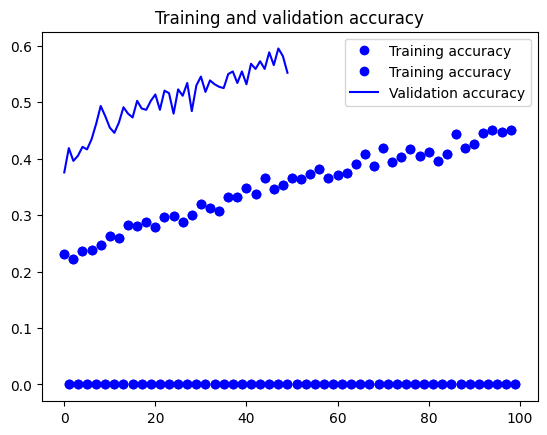

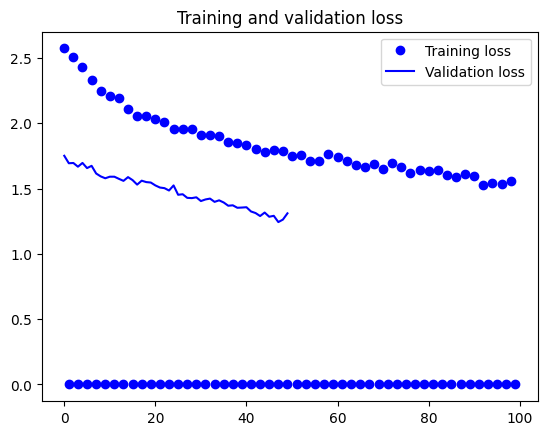

In [52]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs for training and validation data
epochs_training = range(len(accuracy))
epochs_validation = range(len(val_accuracy))

# Plot training and validation accuracy
plt.plot(epochs_training, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_validation, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()  # Create a new figure for the loss plot

# Plot training and validation loss
plt.plot(epochs_training, loss, 'bo', label='Training loss')
plt.plot(epochs_validation, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:10]}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step
The first 5 predictions: ['Nonautoimun_Eczema', 'Autoimun_Psoriasis', 'Autoimun_Psoriasis', 'Nonautoimun_Keratosis_Seborrheic', 'Autoimun_Lichen_Planus', 'Autoimun_Vitiligo', 'Nonautoimun_Eczema', 'Autoimun_Psoriasis', 'Nonautoimun_Eczema', 'Autoimun_Psoriasis']


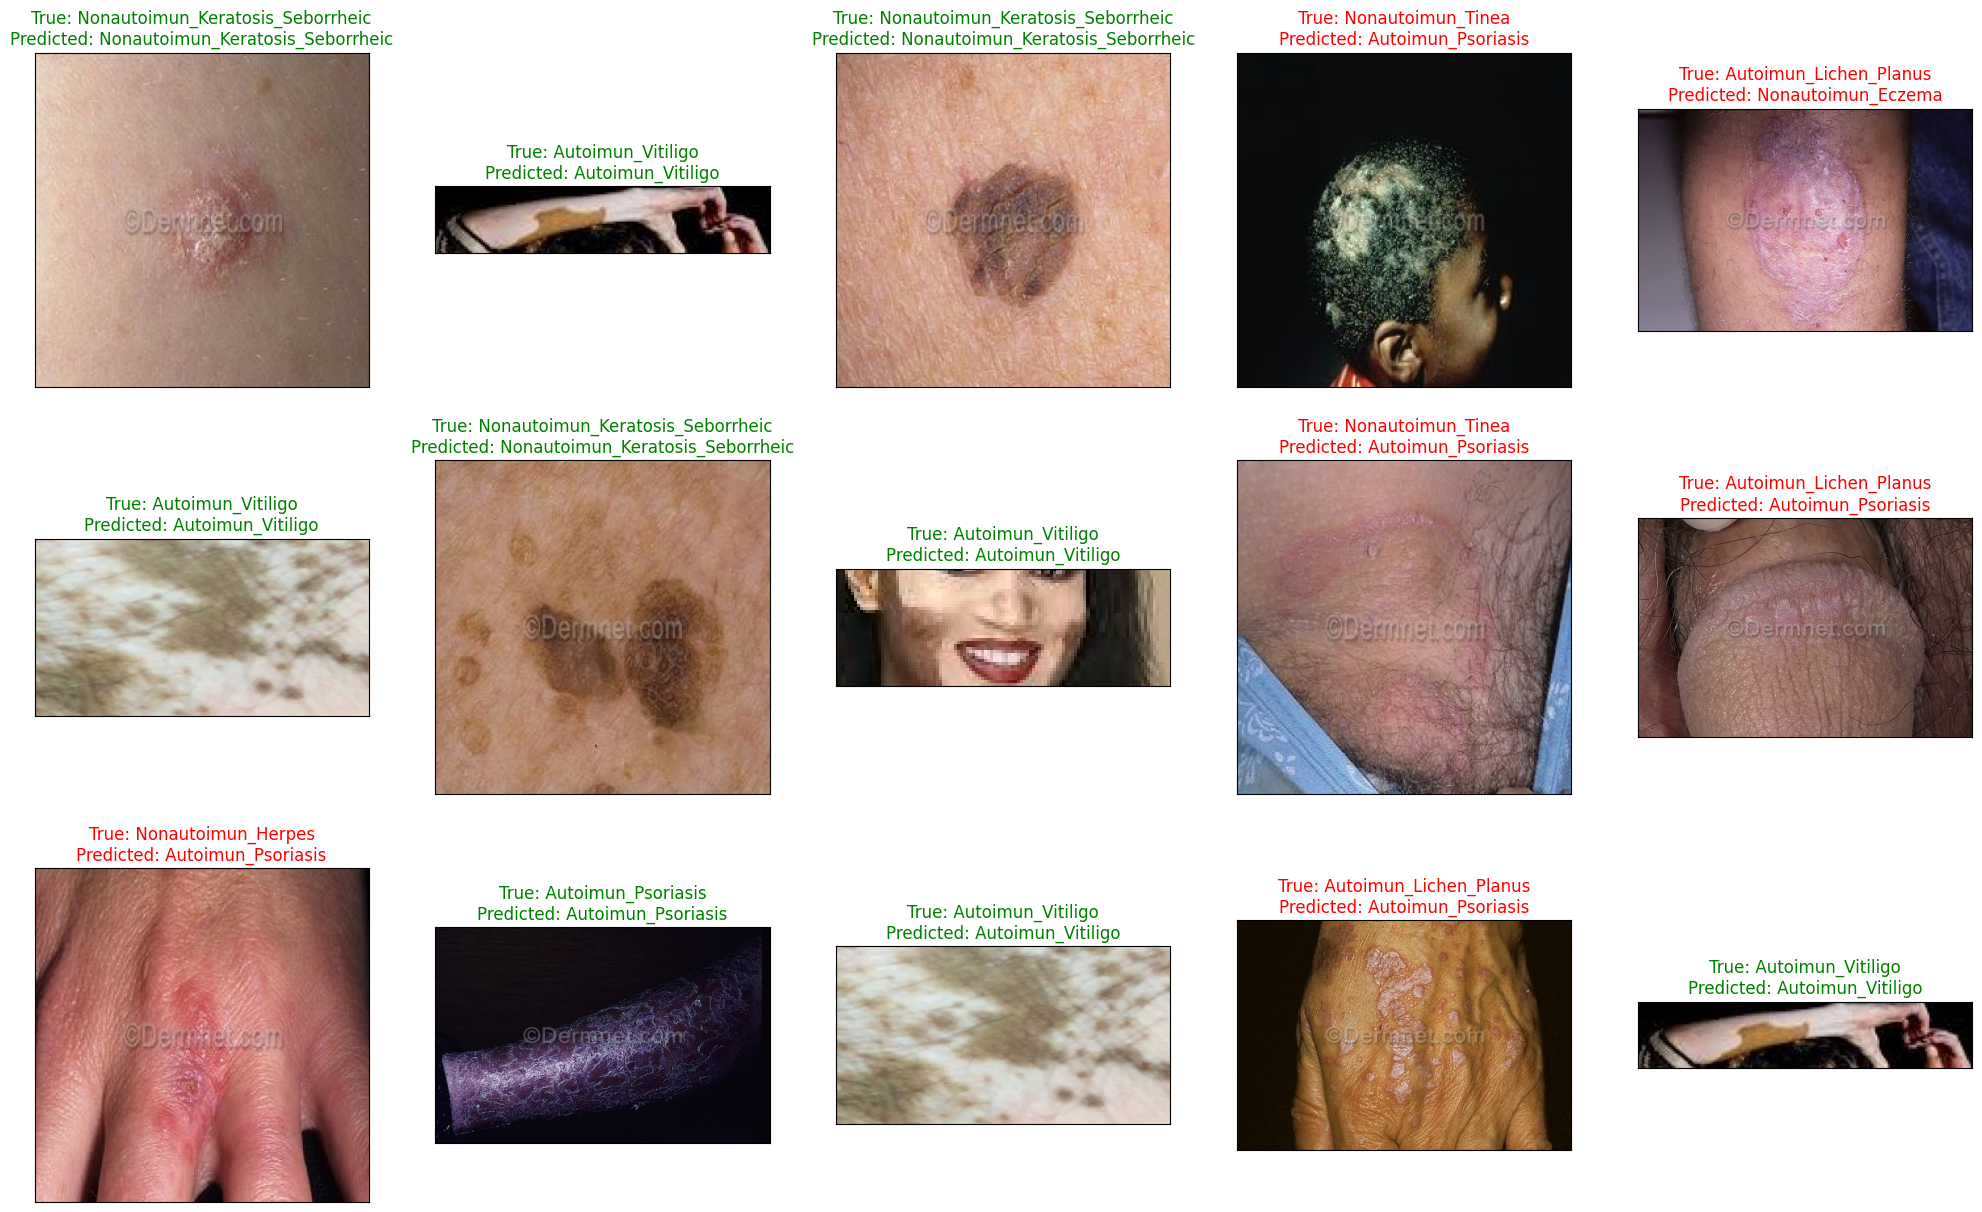

In [55]:
# Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [57]:
y_test = list(test_df.Label)
# Use the complete y_test list instead of slicing it
print(classification_report(y_test, pred))

                                  precision    recall  f1-score   support

        Autoimun_Dermatomyositis       0.00      0.00      0.00        22
          Autoimun_Lichen_Planus       0.50      0.03      0.06        63
              Autoimun_Psoriasis       0.48      0.95      0.64       120
               Autoimun_Vitiligo       0.99      1.00      0.99        85
              Nonautoimun_Eczema       0.41      0.55      0.47        91
              Nonautoimun_Herpes       0.38      0.06      0.11        48
Nonautoimun_Keratosis_Seborrheic       0.64      0.69      0.67        42
               Nonautoimun_Tinea       0.43      0.27      0.33        82

                        accuracy                           0.55       553
                       macro avg       0.48      0.44      0.41       553
                    weighted avg       0.53      0.55      0.48       553



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
report = classification_report(y_test, pred, output_dict=True) #Use the complete y_test list instead of slicing it
df = pd.DataFrame(report).transpose()
df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


precision    recall  f1-score     support
Autoimun_Dermatomyositis           0.000000  0.000000  0.000000   22.000000
Autoimun_Lichen_Planus             0.500000  0.031746  0.059701   63.000000
Autoimun_Psoriasis                 0.483051  0.950000  0.640449  120.000000
Autoimun_Vitiligo                  0.988372  1.000000  0.994152   85.000000
Nonautoimun_Eczema                 0.406504  0.549451  0.467290   91.000000
Nonautoimun_Herpes                 0.375000  0.062500  0.107143   48.000000
Nonautoimun_Keratosis_Seborrheic   0.644444  0.690476  0.666667   42.000000
Nonautoimun_Tinea                  0.431373  0.268293  0.330827   82.000000
accuracy                           0.551537  0.551537  0.551537    0.551537
macro avg                          0.478593  0.444058  0.408279  553.000000
weighted avg                       0.526056  0.551537  0.484470  553.000000

In [61]:
!pip install scikit-learn

<Figure size 640x480 with 0 Axes>

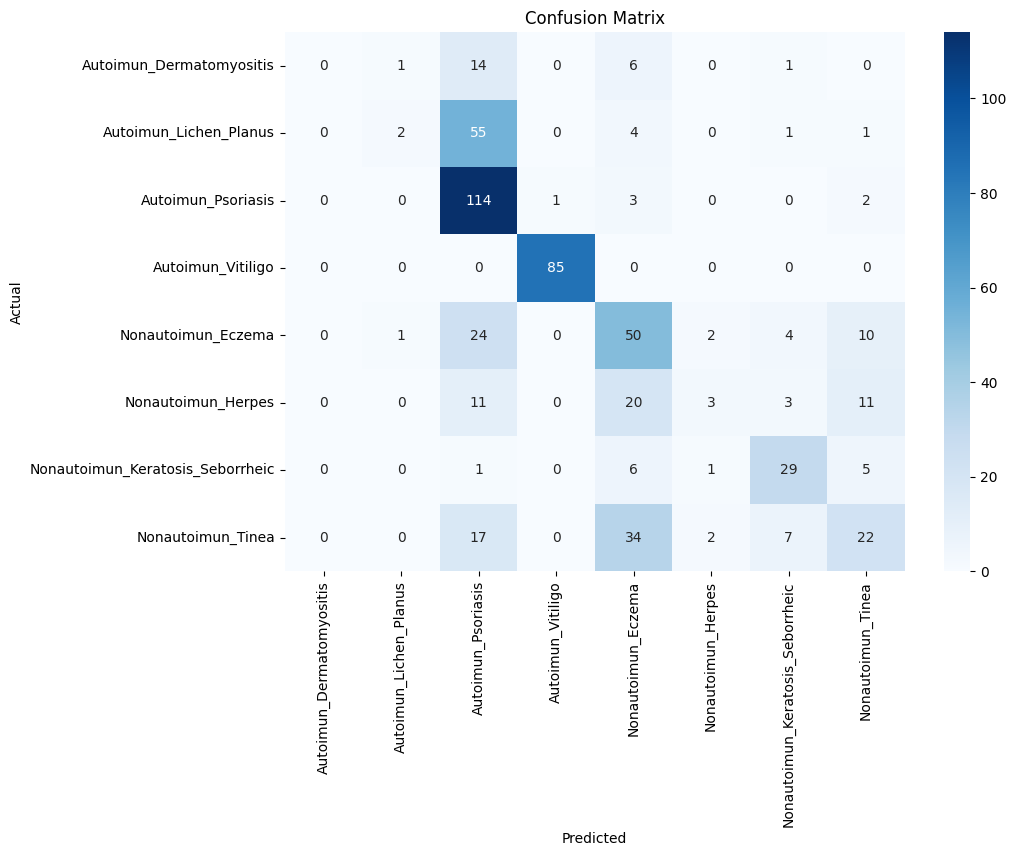

In [63]:
# Import the necessary function from scikit-learn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def make_confusion_matrix(y_true, y_pred, labels):
    """
    Generates and displays a confusion matrix.

    Args:
        y_true: The true labels.
        y_pred: The predicted labels.
        labels: A list of label names.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


# Now you can use make_confusion_matrix in your code
# Use the complete y_test list instead of slicing it to match the length of pred
make_confusion_matrix(y_test, pred, list(labels.values()))

In [1]:
!pip install tensorflow --upgrade #Install/upgrade tensorflow
!pip install "tensorflow-cpu" --upgrade # Install/upgrade  tensorflow-cpu
!pip install "tensorflow-gpu" --upgrade # Install/upgrade  tensorflow-gpu with GPU support.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 MB 2.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output

In [3]:
import tensorflow as tf
print(tf.__version__) # Removed extra space before print

2.18.0


In [4]:
!pip uninstall tensorflow-io
!pip install tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 11.7 MB/s eta 0:00:00


In [5]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2  # Import preprocess_input and MobileNetV2
from tensorflow.keras.applications import MobileNetV2

# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

**BATAS SUCI**

In [ ]:
### Membuat folder yang belum ada ###

segmentation_dir = '/content/drive/My Drive/DATASET/output/segmentation'

!mkdir /content/drive/My\ Drive/DATASET/output/segmentation/test
!mkdir /content/drive/My\ Drive/DATASET/output/segmentation/train
!mkdir /content/drive/My\ Drive/DATASET/output/segmentation/val
!mkdir /content/drive/My\ Drive/DATASET/output/segmentation/train/augmentation
!mkdir /content/drive/My\ Drive/DATASET/output/segmentation/train/image
!mkdir /content/drive/My\ Drive/DATASET/output/segmentation/train/mask
!mkdir /content/drive/My\ Drive/DATASET/output/segmentation/train/dilate

In [ ]:
import os

# Ganti dengan path base directory di Google Drive Anda
base_dir = '/content/drive/My Drive/DATASET/source'

# Path direktori untuk data segmentasi
segmentation_dir = os.path.join(base_dir, "segmentation")
segmentation_test_dir = os.path.join(segmentation_dir, "test")
segmentation_train_dir = os.path.join(segmentation_dir, "train")
segmentation_aug_dir = os.path.join(segmentation_train_dir, "augmentation")
segmentation_image_dir = os.path.join(segmentation_train_dir, "image")
segmentation_mask_dir = os.path.join(segmentation_train_dir, "mask")
segmentation_dilate_dir = os.path.join(segmentation_train_dir, "dilate")

# Path direktori untuk sumber data (base_dir langsung)
segmentation_source_dir = base_dir  # Menggunakan base_dir sebagai sumber data

# Daftar folder untuk data skin lesion
skin_disease_dirs = ['Autoimun_Dermatomyositis', 'Autoimun_Vitiligo', 'Autoimun_Psoriasis',
                    'Autoimun_Lichen_Planus', 'Nonautoimun_Tinea', 'Nonautoimun_Eczema',
                    'Nonautoimun_Herpes', 'Nonautoimun_Keratosis_Seborrheic']

# Loop melalui setiap folder skin lesion
for skin_disease_dir in skin_disease_dirs:
    skin_disease_image_dir = os.path.join(segmentation_source_dir, skin_disease_dir, "image")
    skin_disease_mask_dir = os.path.join(segmentation_source_dir, skin_disease_dir, "mask")

DILATE_KERNEL = np.ones((15, 15), np.uint8)

BATCH_SIZE=2

#Prod
EPOCHS=56

#Desv
#EPOCHS=16

In [ ]:
INPUT_DIR = os.path.join("..", "input")

SEGMENTATION_DIR = os.path.join(INPUT_DIR, "segmentation")
SEGMENTATION_TEST_DIR = os.path.join(SEGMENTATION_DIR, "test")
SEGMENTATION_TRAIN_DIR = os.path.join(SEGMENTATION_DIR, "train")
SEGMENTATION_AUG_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "augmentation")
SEGMENTATION_IMAGE_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "image")
SEGMENTATION_MASK_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "mask")
SEGMENTATION_DILATE_DIR = os.path.join(SEGMENTATION_TRAIN_DIR, "dilate")
SEGMENTATION_SOURCE_DIR = os.path.join(INPUT_DIR, \
                                       "pulmonary-chest-xray-abnormalities")

SHENZHEN_TRAIN_DIR = os.path.join(SEGMENTATION_SOURCE_DIR, "ChinaSet_AllFiles", \
                                  "ChinaSet_AllFiles")
SHENZHEN_IMAGE_DIR = os.path.join(SHENZHEN_TRAIN_DIR, "CXR_png")
SHENZHEN_MASK_DIR = os.path.join(INPUT_DIR, "shcxr-lung-mask", "mask", "mask")

MONTGOMERY_TRAIN_DIR = os.path.join(SEGMENTATION_SOURCE_DIR, \
                                    "Montgomery", "MontgomerySet")

MONTGOMERY_IMAGE_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, "CXR_png")
MONTGOMERY_LEFT_MASK_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, \
                                        "ManualMask", "leftMask")
MONTGOMERY_RIGHT_MASK_DIR = os.path.join(MONTGOMERY_TRAIN_DIR, \
                                         "ManualMask", "rightMask")

DILATE_KERNEL = np.ones((15, 15), np.uint8)

BATCH_SIZE=2

#Prod
EPOCHS=56

#Desv
#EPOCHS=16